In [1]:
%run pylib/mc_dev
# show(sim_design_thoughts, summary='Simulation design')
name = '4FGL J1520.8-0348'
name = '4FGL J0056.3-0935' # strong single-step
show(f"""Choose {name} to use for MC study""")
with capture_hide(f'Source setup output for {name}') as printout:
    wtl = WtLike(name, clear=True)
show(printout)
show(f'Will use its {len(wtl.photons)} weight values for simulation') 

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7420d0099510>

# Monte Carlo BB light curve study 

<h5 style="text-align:right; margin-right:15px"> 2025-05-02 11:40</h5>

Choose 4FGL J0056.3-0935 to use for MC study

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7420ca31d0c0>

Will use its 79409 weight values for simulation

## BB with data

Bayesian Blocks: partitioning 866  cells using LikelihoodFitness with penalty 5%
	found 2 / 866 blocks.
LightCurve: Loaded 2 / 2 cells for fitting


TSvar = 22.4

Step observed at MJD 57189.0, 
ratio 1.78

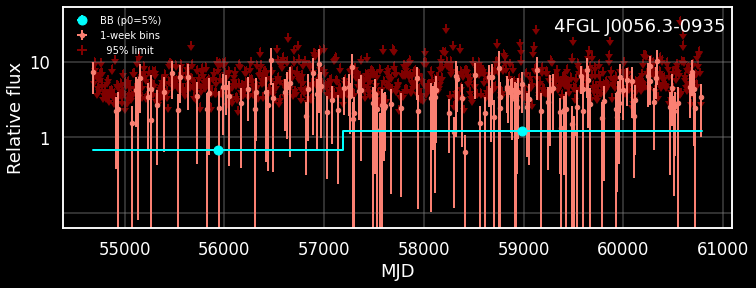

In [2]:
show(f"""## BB with data""")
bb = wtl.bb_view()
bb.plot(log=True);
show(f"""TSvar = {TS(bb.fits):.1f}""")

ff = bb.fits
show(f"""Step observed at MJD {(tstep:=ff.t[0]+ff.tw[0]/2)}, 
ratio {ff.fit[1].flux/ff.fit[0].flux:.2f}""")

In [3]:
tstart=ff.t[0]-ff.tw[0]/2; tstart
wstep = (tstep-tstart)/7; wstep

358.0

In [4]:
show(f"""## Simulate **all** the cells
Then run the BB to test the null hypotheses.
""")

simcell = SimCell(wtl)
show(f"""Created  {simcell}""")

## Simulate **all** the cells
Then run the BB to test the null hypotheses.

Created  SimCell using weights from 4FGL J0056.3-0935

In [13]:
from wtlike.interface import SourceAnalyzer as SA

In [5]:
lcs = generate_trials(wtl, 100, 30)
z = np.array([len(lc) for lc in lcs])-1
show(f"""Step numbers: Mean {np.mean(z):.1f}, maximum {np.max(z)} """)

### Run 100 trials, interval=30 

elapsed time: 77.6s (1.3 min)

Step numbers: Mean 0.0, maximum 1 

In [6]:
def ranbf():
    show(f"""### Random trials""")
    with capture_hide('Randomize output') as out:
        wx3 = wtl.view(apply=simcell)
        dff =wx3.bb_view().fits
        dfb=wx3.bb_view(reverse=True).fits       
    show(out)

    show(f'Forward:, TS={TS(dff):.1f}');  show(dff); 
    show(f'Backward: TS={TS(dfb):.1f}');  show(dfb)

ranbf()

### Random trial

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7420edd18c70>

Forward:, TS=0.1

,t,tw,n,e,fit
0,57735.0,6104.0,78887,352.022574,"1.019[1+0.057-0.057], < 1.11"


Backward: TS=0.1

,t,tw,n,e,fit
0,57735.0,6104.0,78887,352.022574,"1.019[1+0.057-0.057], < 1.11"


In [7]:
show_link('top')

<a href="#top">top</a>

In [8]:
show(sim_design_thoughts)

---
## Simulation procedure step
We want to focus on a single step in the signal
function. Rather than run BB for long periods, we
isolate a handful of cells involved.

### Setup
Take a set of data cells, make three groups:
1. Before -- well before the measured transition. Combine these to one
2. Bracket -- inbetween, keep to adjust
3. After -- well after, combine as well

### Simulation
1. Choose a step position within the bracket, default the measured one
2. For each of the bracketed cells, create a new cell with the expected flux 
3. Run BB with the new set

### Code requirements
1. cell simulator<br>
A cell is defined by a set of weights $w$ and $S$, the expected number of weights. ($B$ is zero,
no background variation.)
Our randomization means, for an expected flux ratio $f$, selecting a new 
set of weights such that
* The number of weights $n$ is poisson-selected such that $<n> = f S$.
* The weights are chosen from the experimental distribution. `wtlike.simulation._Sampler`
designed for this
2. Interface to BB might need tweaking--but it is only an ordered set of cells in which it 
finds partitions.

In [9]:
cells = wtl.cells
edges = np.append(cells.t-cells.tw/2, cells.iloc[-1].t+cells.iloc[-1].tw/2)


# make three bins , at k, m
k,m = 400,500
pedges = np.array([edges[0], edges[k], edges[m], edges[-1]]); part 

from wtlike.cell_data import partition_cells
from wtlike.lightcurve import fit_cells
def p_view(self, new_edges):
    """ New view with arbitrary partition
    """
    # basic copy
    r = self.view()

    # make new set of cells and add poisson fits
    r.cells = partition_cells(self.config, self.cells, new_edges)
    r.fits = fit_cells(self.config, r.cells, )
    return r

NameError: name 'part' is not defined

In [ ]:
pv = p_view(wtl, pedges)
show(pv.fits)
pv.plot();

In [ ]:
bbv =pv.bb_view()
bbv.plot();

In [ ]:
show_link('top')

In [ ]:
from wtlike import *
check_data()